In [26]:
#importing necessary libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')

In [2]:
#reading all files
order_products_train = pd.read_csv('order_products__train.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')

In [3]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [4]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [5]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


By understanding all the dataframes. I think it is best to merge dataframes: prior, orders, products, & aisles to get all the data for PCA analysis.

In [6]:
df1 = order_products_prior[['order_id', 'product_id']]
df2 = products[['product_id', 'aisle_id']]
df3 = orders[['order_id','user_id']]
df4 = aisles[['aisle_id','aisle']]
df = pd.merge(df1,df2,on='product_id')
df = pd.merge(df,df3,on='order_id')
df = pd.merge(df,df4,on='aisle_id')
df.head()

,order_id,product_id,aisle_id,user_id,aisle
0,2,33120,86,202279,eggs
1,2,28985,83,202279,fresh vegetables
2,2,9327,104,202279,spices seasonings
3,2,45918,19,202279,oils vinegars
4,2,30035,17,202279,baking ingredients


Now in my data exploration notebook, I found that based on aisele name(it will act as category).

If we build a crosstab dataframe using user_id & aisele name, we can get the eigen vector for each user.

If we apply PCA to this dataframe then we can get the central tendency of customers using initial PC(Principal compoenets)

In [8]:
customer_aisele = pd.crosstab(df.user_id,df.aisle)
customer_aisele.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,3,0,0,0,0,2,0,0,0,...,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(customer_aisele)
pca_samples = pca.transform(customer_aisele)

In [25]:
pc_cust_aise = pd.DataFrame(pca_samples)
pc_cust_aise.head()

,0,1,2,3,4
0,-24.215659,-2.429427,-2.466370,0.145686,0.269042
1,6.463208,-36.751116,8.382553,-15.097530,-6.920938
2,-7.990302,-2.404383,-11.030064,-0.672230,-0.442368
3,-27.991129,0.755823,-1.921732,-2.091888,-0.288232
4,-19.896394,2.637225,0.533229,-3.679228,0.612825


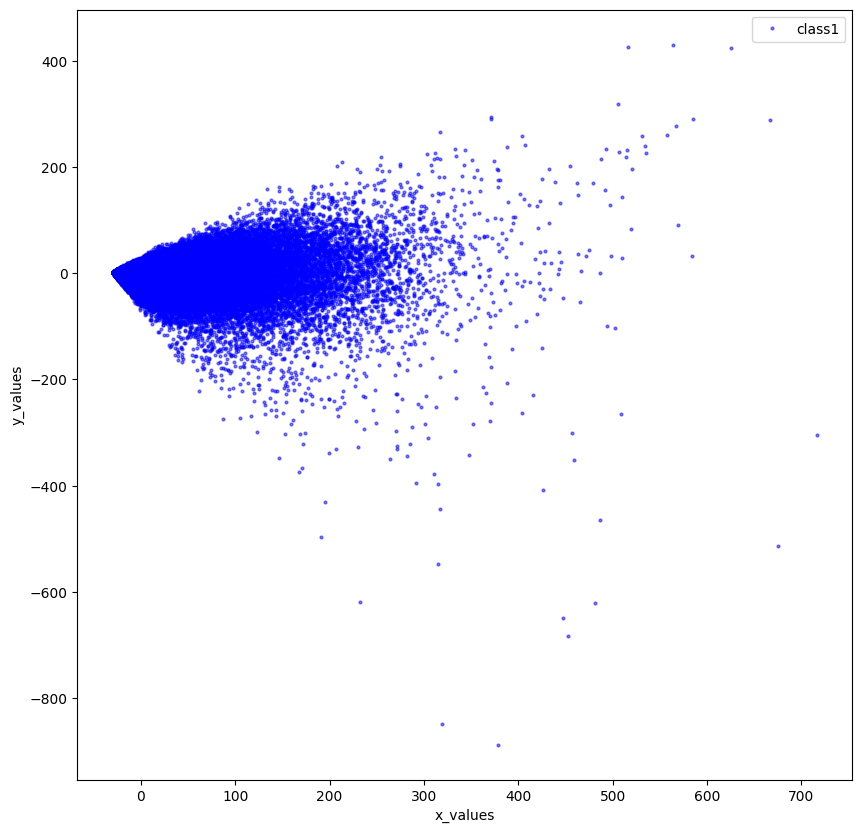

In [23]:
tocluster = pd.DataFrame(pc_cust_aise[[0,1]])
fig = plt.figure(figsize=(10,10))
plt.plot(tocluster[0], tocluster[1], 'o', markersize=2, color='blue', alpha=0.5, label='class1')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

In [27]:
# I will try building KNN classifier using PC0 & PC1
clusterer = KMeans(n_clusters=4,random_state=42).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)

['purple', 'orange', 'purple', 'purple', 'purple', 'purple', 'orange', 'purple', 'purple', 'orange']


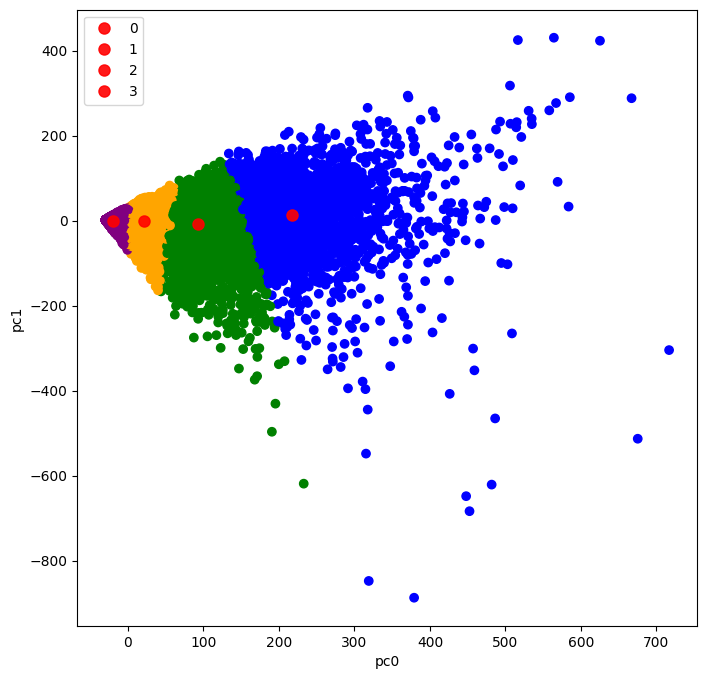

In [78]:
fig = plt.figure(figsize=(8,8))
colors = ['orange','blue','purple','green']
colored = [colors[k] for k in c_preds]
print (colored[0:10])
plt.scatter(tocluster[0],tocluster[1],  color = colored)
for ci,c in enumerate(centers):
    plt.plot(c[0], c[1], 'o', markersize=8, color='red', alpha=0.9, label=''+str(ci))

plt.xlabel('pc0')
plt.ylabel('pc1')
plt.legend()
plt.savefig('customer_segements.png',dpi=300)
plt.show()

This distict color regions represents customer segements based on aisles where they constantly buy products from.

Now let's relate this predictions with real user's data.

Do you remember the cross tab datframe we built. We can relate these predictions to see if clusters show us any patterns as such.

In [35]:
df = customer_aisele.copy()
df['cluster'] = c_preds
df.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
2,0,3,0,0,0,0,2,0,0,0,...,1,1,0,0,0,0,2,0,42,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,2,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,2
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,2


If you see in the above dataframe, we added cluster at the end.

The cluster number now successfully classify each user(customer) based on historical order data.

Now let's see if we see any interesting patterns.

In [71]:
# summary of cluster 0
c0 = df[df['cluster'] == 0].drop('cluster',axis=1).mean()
c0.sort_values(ascending=False).head(10)

,0
aisle,
fresh fruits,29.807197
fresh vegetables,29.315842
packaged vegetables fruits,14.799389
yogurt,11.725521
packaged cheese,7.956835
milk,7.031354
water seltzer sparkling water,6.540800
chips pretzels,5.776318
soy lactosefree,5.355804


In [72]:
# summary of cluster 1
c1 = df[df['cluster'] == 1].drop('cluster',axis=1).mean()
c1.sort_values(ascending=False).head(10)

,0
aisle,
fresh vegetables,155.811722
fresh fruits,153.612939
packaged vegetables fruits,67.023500
yogurt,49.403926
packaged cheese,30.780758
milk,29.323472
soy lactosefree,19.620127
bread,18.103677
baby food formula,17.730440


In [73]:
c2 = df[df['cluster'] == 2].drop('cluster',axis=1).mean()
c2.sort_values(ascending=False).head(10)

,0
aisle,
fresh fruits,5.795118
fresh vegetables,5.274188
packaged vegetables fruits,3.160416
yogurt,2.623020
water seltzer sparkling water,2.323290
packaged cheese,2.074725
milk,1.831171
chips pretzels,1.818751
ice cream ice,1.412812


In [74]:
c3 = df[df['cluster'] == 3].drop('cluster',axis=1).mean()
c3.sort_values(ascending=False).head(10)

,0
aisle,
fresh fruits,77.186395
fresh vegetables,67.093572
packaged vegetables fruits,34.437444
yogurt,30.978049
packaged cheese,18.035136
milk,17.275921
water seltzer sparkling water,13.160399
chips pretzels,11.864474
soy lactosefree,11.749700


Even if we separate customers into clusters, some products are just common across different customer types.

These products are:
1. Fresh fruits
2. Fresh Vegetables
3. Packaged Vegetables Fruits
4. Yogurt
5. Packaged Cheese
6. Milk
7. Water Seltzer sparkling water
8. Chips pretzels

Let's define customer profile based on percentage of top 10 product orders.

In [77]:
top_eight_means = [[c0['fresh fruits'],c0['fresh vegetables'],c0['packaged vegetables fruits'], c0['yogurt'], c0['packaged cheese'], c0['milk'],c0['water seltzer sparkling water'],c0['chips pretzels']],
                 [c1['fresh fruits'],c1['fresh vegetables'],c1['packaged vegetables fruits'], c1['yogurt'], c1['packaged cheese'], c1['milk'],c1['water seltzer sparkling water'],c1['chips pretzels']],
                 [c2['fresh fruits'],c2['fresh vegetables'],c2['packaged vegetables fruits'], c2['yogurt'], c2['packaged cheese'], c2['milk'],c2['water seltzer sparkling water'],c2['chips pretzels']],
                 [c3['fresh fruits'],c3['fresh vegetables'],c3['packaged vegetables fruits'], c3['yogurt'], c3['packaged cheese'], c3['milk'],c3['water seltzer sparkling water'],c3['chips pretzels']]]
top_eight_means = pd.DataFrame(top_eight_means, columns = ['fresh fruits','fresh vegetables','packaged vegetables fruits','yogurt','packaged cheese','milk','water seltzer sparkling water','chips pretzels'])

cluster_perc = top_eight_means.iloc[:,:].apply(lambda x: x/x.sum()*100, axis=1)
cluster_perc

,fresh fruits,fresh vegetables,packaged vegetables fruits,yogurt,packaged cheese,milk,water seltzer sparkling water,chips pretzels
0,26.388966,25.953959,13.102225,10.380861,7.044361,6.225012,5.790714,5.113901
1,29.599524,30.023206,12.914692,9.519593,5.931114,5.650311,3.071464,3.290097
2,23.272933,21.180900,12.692087,10.533929,8.332002,7.353899,9.330227,7.304023
3,28.584230,24.846582,12.753126,11.472018,6.678904,6.397746,4.873655,4.393739


By observing distribution of Top 8 products among 4 clusters:
- Cluster 1: buy more packaged vegetables fruits compated to other clusters.
- Cluster 2: buy most fresh fruits & fresh vegetables compared to other clusters.
- Cluster 3: buy most sparkling water & chips campated to other clusters.
- Cluster 4: most balanced cluster across all top 8 products.

These clusters can make more sense when merged with customer demographichs. This will create more opportunities for targetted marketing efforts.

---

### 🚀 Next Steps

I want to deploy this model but I lack data pipeline infrastructre. It needs continous stream of data.

In real world enviorment, this notebook can serve as an ETL pipe for the KNN Classifier we built.

The datastream can access model inferences via API call to segement new customers.